# Interactive Cancer Risk Predictor (ML & DL)

## Data import

In [8]:
# importing necessary libraries

import pandas as pd
import numpy as np
import os
import warnings
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import mlflow
import mlflow.sklearn
import mlflow.tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import joblib

In [9]:
# Set Seeds for Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
# Load and preprocess data
data = load_breast_cancer()

## Exploratory data analysis

In [11]:
# Convert to DataFrame
pd.Series(data['target']).value_counts()

1    357
0    212
Name: count, dtype: int64

In [12]:
# Convert to DataFrame
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [13]:
# Display first few rows
print("Shape of dataset:", X.shape)

Shape of dataset: (569, 30)


In [14]:
# Display Data types and missing values
print("\nData types and missing values:")
print(X.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64

In [15]:
# Summary statistics
print("\nSummary statistics:")
print(X.describe())


Summary statistics:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             

In [16]:
# visualize the data
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [17]:
# Describe the data
X.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


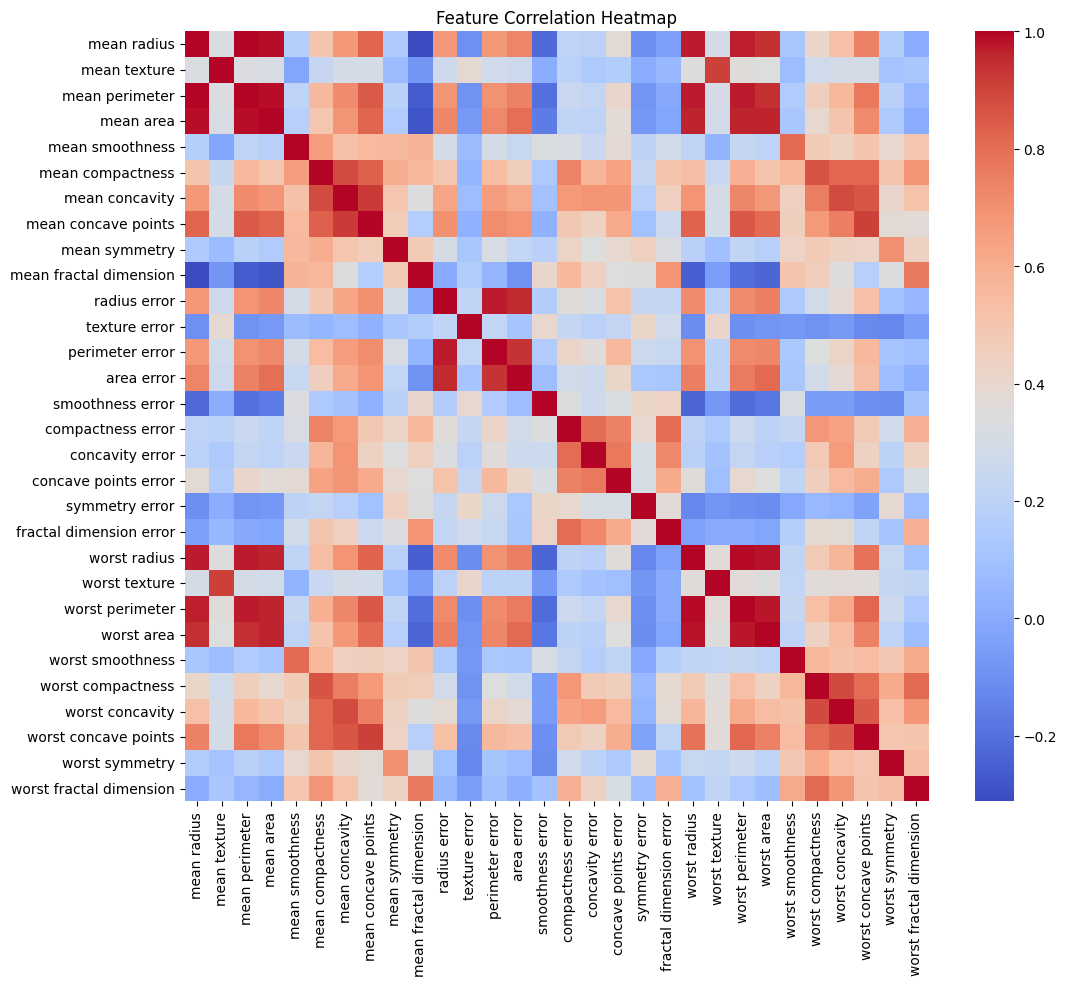

In [18]:
# Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

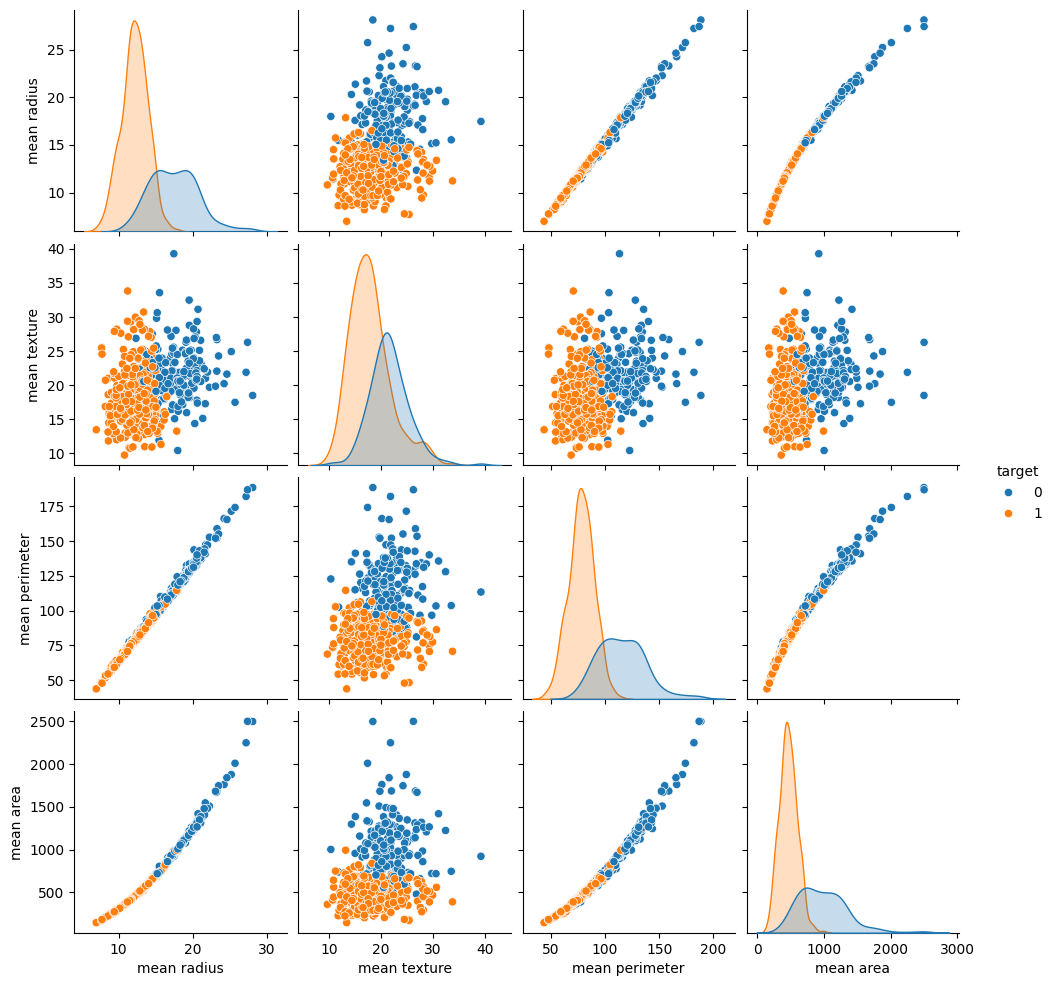

In [19]:
# Define selected features
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']  # Example features

# Pairplot for selected features
X['target'] = y  # Add target column to the dataframe temporarily
sns.pairplot(X[selected_features + ['target']], hue='target')
X.drop(columns=['target'], inplace=True)  # Remove the target column after plotting
plt.show()

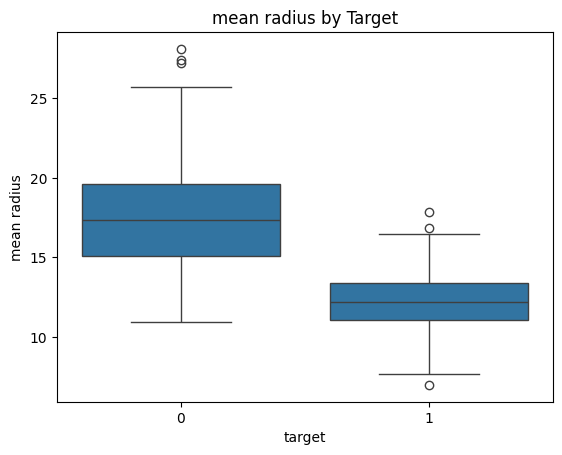

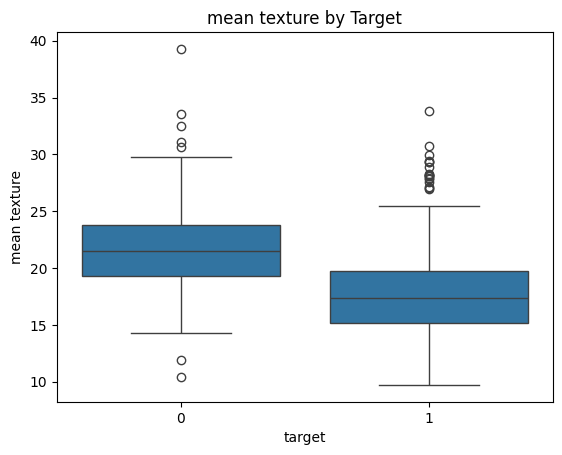

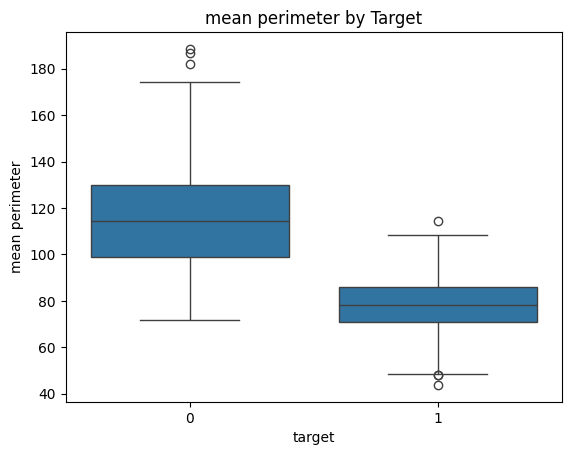

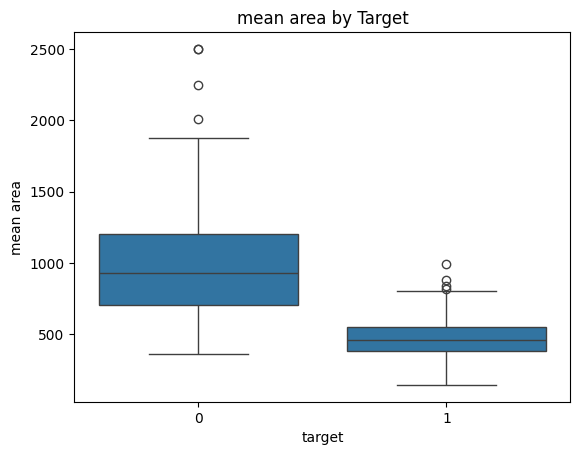

In [20]:
# Boxplots of features grouped by target
X['target'] = y  # Temporarily add the target column to the DataFrame
for col in selected_features:
    sns.boxplot(x='target', y=col, data=X)
    plt.title(f"{col} by Target")
    plt.show()
X.drop(columns=['target'], inplace=True)  # Remove the target column after plotting

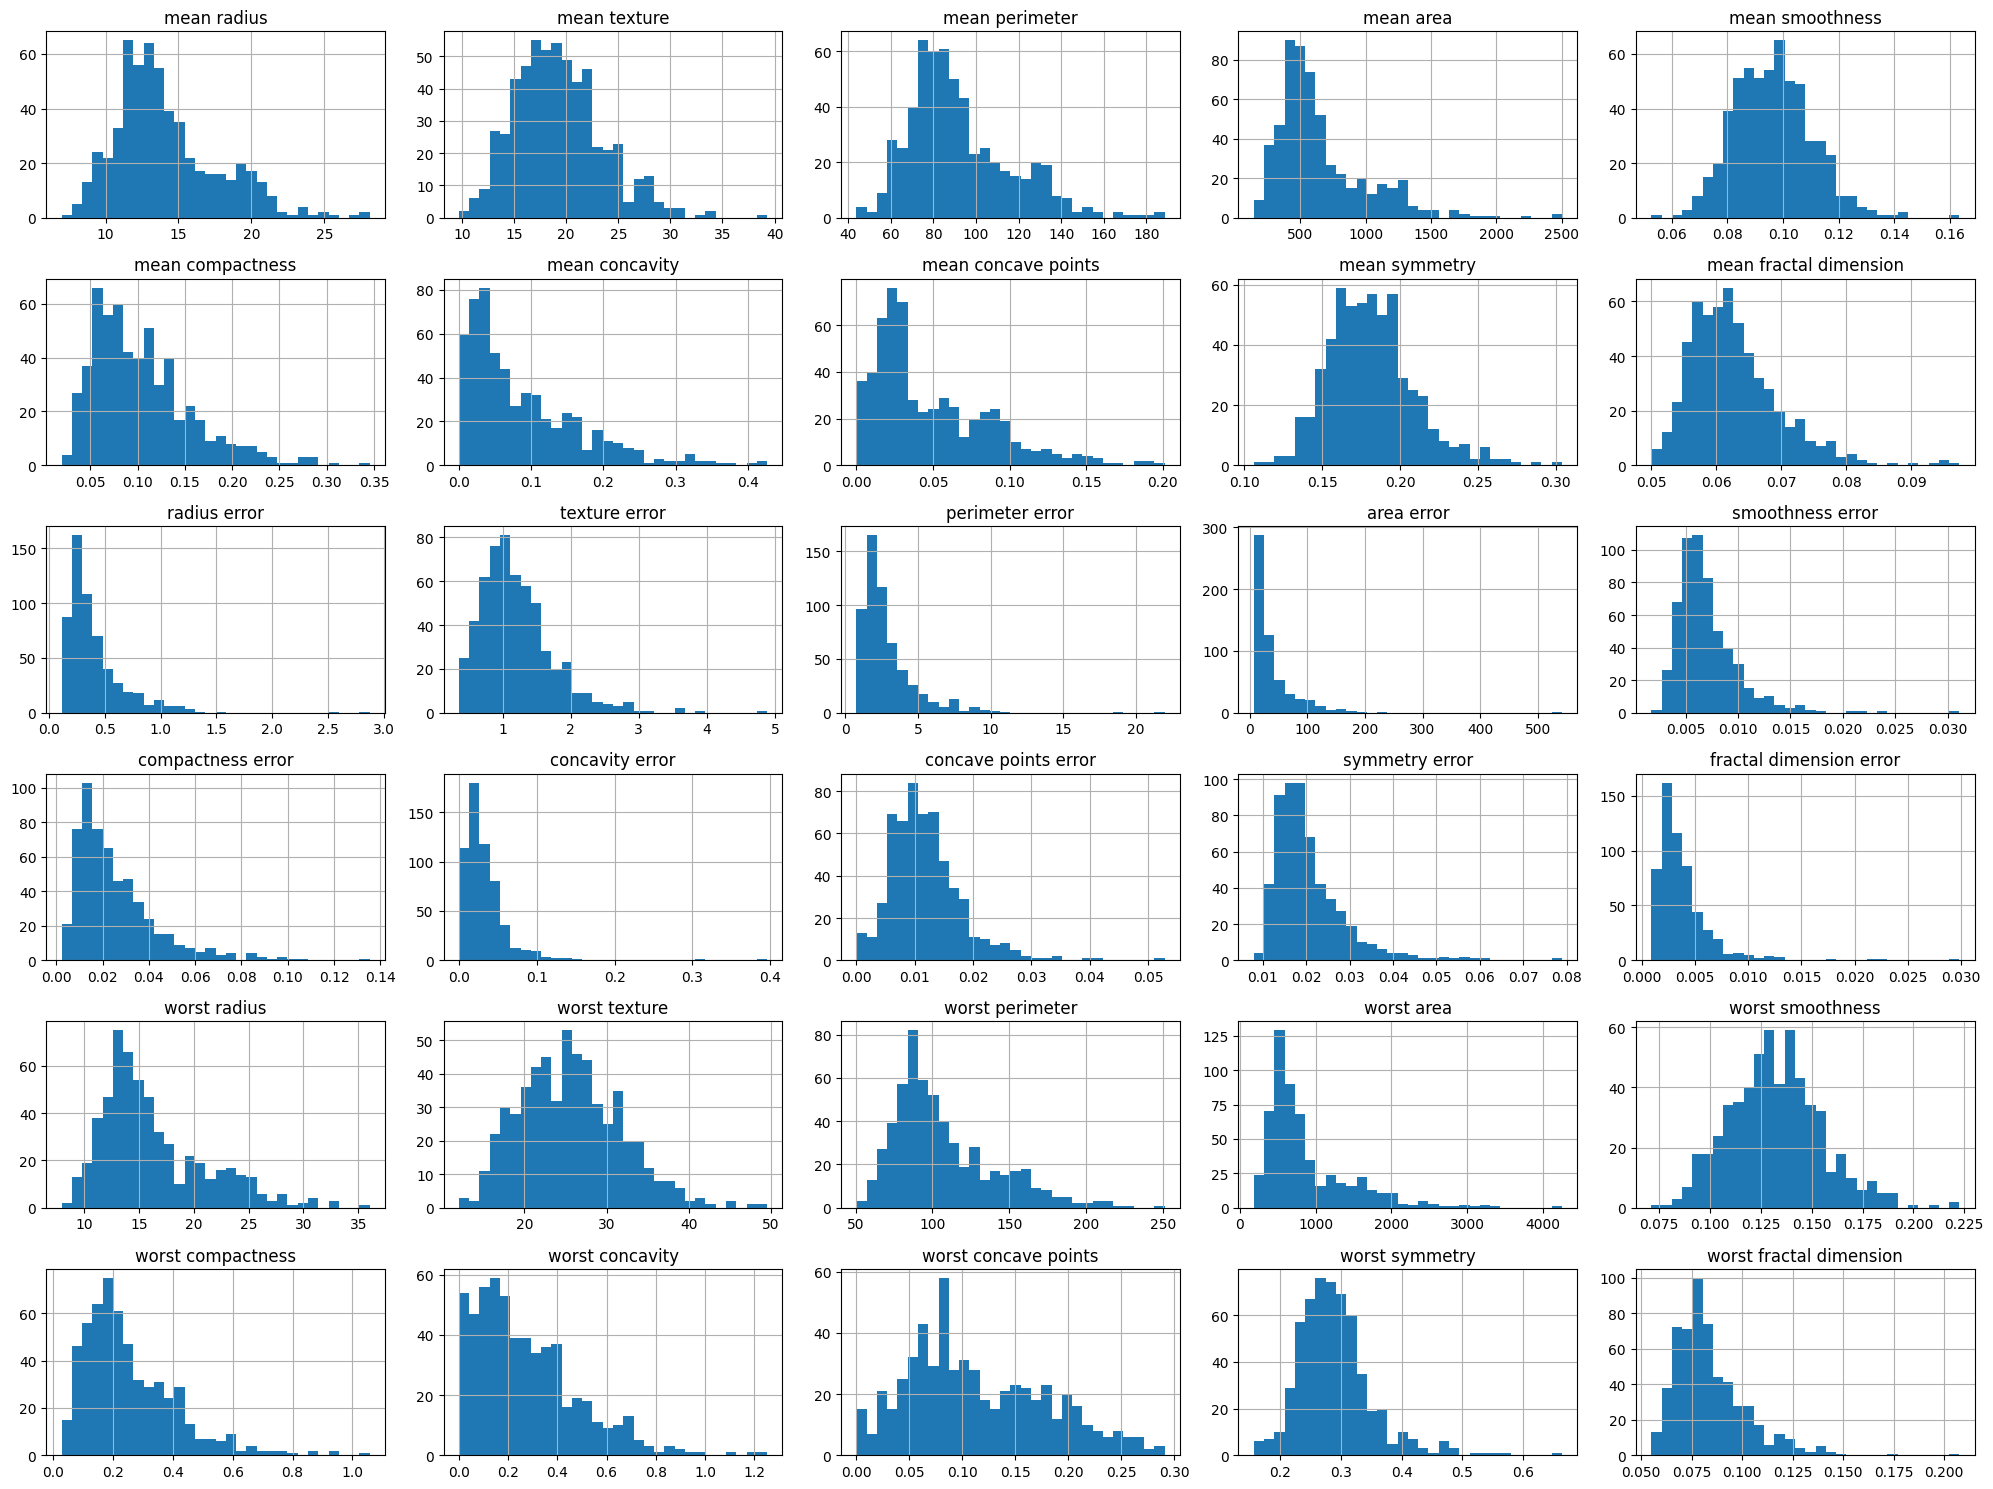

In [21]:
# Histogram of features
X.hist(figsize=(20, 15), bins=30)
plt.tight_layout()
plt.show()

## Feature Engineering

In [22]:
# Feature Engineering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Export scaler
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

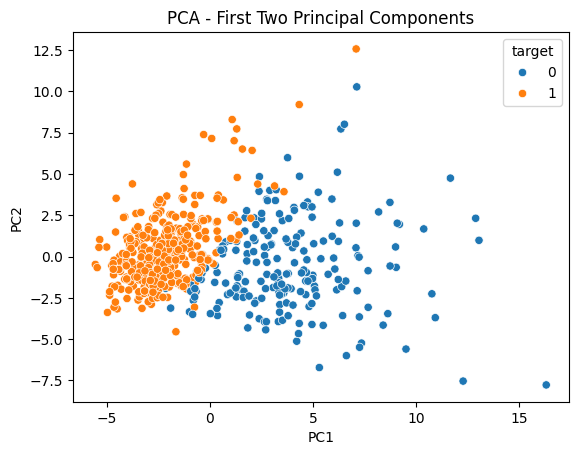

In [23]:

# PCA Visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['target'] = y  # Use the correct target variable
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target')
plt.title("PCA - First Two Principal Components")
plt.show()

## Model Training and Evaluation

#### change the path

In [24]:
# Path to the local mlruns directory (use file:// for MLflow to recognize it properly)
# change this to your desired path
mlruns_path = "file:///D:/Machine learning/ML/Classification_ML_and_DL/mlruns"

# Create the folder if it doesn't exist
os.makedirs("D:/Machine learning/ML/Classification_ML_and_DL/mlruns", exist_ok=True)

# Set tracking URI
mlflow.set_tracking_uri(mlruns_path)

# Set the experiment
mlflow.set_experiment("Breast Cancer Classification")


<Experiment: artifact_location=('file:///D:/Machine '
 'learning/ML/Classification_ML_and_DL/mlruns/581138374331298237'), creation_time=1745049576908, experiment_id='581138374331298237', last_update_time=1745049576908, lifecycle_stage='active', name='Breast Cancer Classification', tags={}>

### Random Forest

In [25]:

# Train and log Random Forest
with mlflow.start_run(run_name="RandomForest"):
    rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    mlflow.log_params(rf.get_params())
    mlflow.log_metrics({
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
    })

    mlflow.sklearn.log_model(rf, "model")
    joblib.dump(rf, "random_forest_model.pkl")


2025/04/19 13:35:02 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2025/04/19 13:35:09 WARNING mlflow.models.model: Model logged without a signature and input example. Ple

### SVM

In [26]:

# Train and log SVM
with mlflow.start_run(run_name="SVM"):
    svm = SVC(probability=True, kernel='rbf', C=1.0, gamma='scale')
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    mlflow.log_params(svm.get_params())
    mlflow.log_metrics({
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
    })

    mlflow.sklearn.log_model(svm, "model")
    joblib.dump(svm, "svm_model.pkl")


2025/04/19 13:35:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


### Bagging

In [27]:

# Train and log BaggingClassifier
with mlflow.start_run(run_name="Bagging"):
    bag = BaggingClassifier(estimator=LogisticRegression(), n_estimators=50, random_state=42)
    bag.fit(X_train, y_train)
    y_pred = bag.predict(X_test)

    mlflow.log_params(bag.get_params())
    mlflow.log_metrics({
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, bag.predict_proba(X_test)[:, 1])
    })

    mlflow.sklearn.log_model(bag, "model")
    joblib.dump(bag, "bagging_model.pkl")

2025/04/19 13:35:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


### Stacking

In [28]:

# Train and log StackingClassifier
with mlflow.start_run(run_name="Stacking"):
    estimators = [
        ("rf", RandomForestClassifier(n_estimators=100, random_state=42)),
        ("svc", SVC(kernel="linear", probability=True))
    ]
    stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
    stack.fit(X_train, y_train)
    y_pred = stack.predict(X_test)

    mlflow.log_params(stack.get_params())
    mlflow.log_metrics({
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, stack.predict_proba(X_test)[:, 1])
    })

    mlflow.sklearn.log_model(stack, "model")
    joblib.dump(stack, "stacking_model.pkl")


2025/04/19 13:35:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


### Neural Networks (Keras)

In [29]:

# Train and log Deep Learning model (Keras)
with mlflow.start_run(run_name="DeepLearning"):
    dl_model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = dl_model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=16,
        callbacks=[early_stop],
        verbose=0
    )

    y_pred_probs = dl_model.predict(X_test).ravel()
    y_pred = (y_pred_probs > 0.5).astype(int)

    mlflow.log_params({"optimizer": "adam", "epochs": len(history.history['loss']), "batch_size": 16})
    mlflow.log_metrics({
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_pred_probs)
    })

    mlflow.tensorflow.log_model(dl_model, "model")
    dl_model.save("models/deep_learning_model.h5")

# Optional: You can launch MLflow UI via terminal:
# mlflow ui






4/4 [==============================] - 0s 5ms/step


2025/04/19 13:35:28 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\india\AppData\Local\Temp\tmp41jcxim3\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\india\AppData\Local\Temp\tmp41jcxim3\model\data\model\assets
2025/04/19 13:35:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
C:\Users\india\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Run this command in the terminal to see the metrics and all

mlflow ui 

# Model Comparison Table

| Model                          | Type            | Pros                                                         | Cons                                                           | Usefulness in Biomedical Context                                |
|---------------------------------|-----------------|--------------------------------------------------------------|----------------------------------------------------------------|----------------------------------------------------------------|
| Logistic Regression             | Linear Model    | Simple, interpretable, fast training                         | Assumes linearity, not good with complex patterns              | Good baseline, interpretable for doctors/researchers            |
| SVM                             | Margin-based    | Works well in high-dim space, handles non-linear kernels      | Slow with large datasets, not probabilistic by default         | Excellent for clean, well-separated features                     |
| Naive Bayes                     | Probabilistic   | Fast, works well with high-dimensional sparse data            | Assumes feature independence (rare in biomedical data)         | Can work well with gene expression or text-based features        |
| K-NN                            | Lazy Learner    | Simple, no training time                                      | Sensitive to scaling, memory-heavy, slow at inference          | Not ideal for large biomedical datasets, better for small problems |
| Decision Tree                   | Tree-based      | Interpretable, non-linear, captures interactions              | Prone to overfitting                                           | Great for initial insights or simple rule-based decisions       |
| Random Forest (Bagging)         | Ensemble        | Reduces overfitting, handles missing values, robust          | Slower training, less interpretable than single tree           | Often outperforms simpler models, solid choice for tabular data  |
| Gradient Boosting (XGBoost, LightGBM) | Ensemble        | High accuracy, handles complex relationships                  | Slower training, sensitive to hyperparams                       | Top performer in biomedical ML competitions                     |
| Stacking                        | Meta Ensemble   | Combines strengths of multiple models, often improves accuracy | Complex pipeline, difficult to interpret                       | Useful in competitions or production where accuracy is critical |
| Deep Learning (DNN)             | Neural Net      | Captures complex non-linearities, flexible                   | Needs more data, prone to overfitting, less interpretable      | Useful if data is big or unstructured (images, sequences, EHR)  |


## Steps for MlFlow

pip freeze > requirements.txt

docker build -t DockerFile .


docker run -p 8501:8501 breast-cancer-classifier


http://localhost:8501